In [2]:
import numpy as np
import emilys.optics.mtf as mtf
import matplotlib.pyplot as plt
import emilys.image.arrayplot as aplt
%matplotlib inline

In [3]:
# load MTF values from file
# ! Set the file name to where it is on your local drive !
lmtf = mtf.loadmtf('D:Dateien/Python/emilys/data/Merlin-300keV-SPCM100.mtf')

- number of mtf values:  129
- Nyquist index:  127


In [4]:
# transpose to access lists of f and mtf(f)
lmtft = lmtf.T

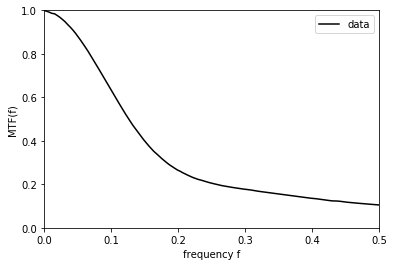

In [5]:
# plot data over frequency range (0 ... 1)
plt.plot(lmtft[0],lmtft[1],'k-',label='data')
plt.axis([0.,.5,0.,1.])
plt.xlabel('frequency f')
plt.ylabel('MTF(f)')
plt.legend()
plt.show()

In [6]:
# import fitting routine
from scipy.optimize import curve_fit

In [7]:
# define exponential function fitted to tail of the mtf data
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

In [8]:
# fit to the last 1/3 values
ndata = lmtf.shape[0]
nfitrng = np.array([2*int(ndata/3),ndata])
fdata = lmtf[nfitrng[0]:nfitrng[1]].T
popt = curve_fit(func, fdata[0], fdata[1])
print(popt)

(array([0.4447602 , 3.79316776, 0.03803341]), array([[1.33935655e-04, 2.00261010e-03, 4.80135898e-05],
       [2.00261010e-03, 3.05787026e-02, 7.41996561e-04],
       [4.80135898e-05, 7.41996561e-04, 1.81295551e-05]]))


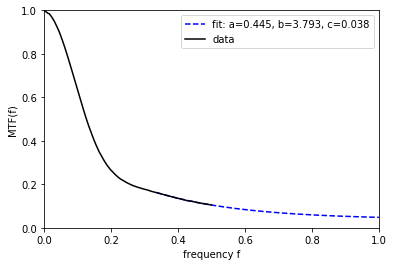

In [9]:
# show fit result
dx = lmtft[0,1]
n = 2*lmtft[0].size - 1
xdata = np.arange(nfitrng[0],n) * dx
plt.plot(xdata, func(xdata, *popt[0]), 'b--', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt[0]))
plt.plot(lmtft[0],lmtft[1],'k-',label='data')
plt.axis([0.,1.,0.,1.])
plt.xlabel('frequency f')
plt.ylabel('MTF(f)')
plt.legend()
plt.show()

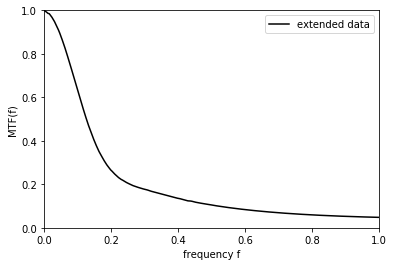

In [10]:
# extrapolate frequency range from 0.5 to 1 from the fitted exponential
fextr = np.arange(nfitrng[1]+1,n) * dx
mtfextr = func(fextr, *popt[0])
lmtf1t = np.array([np.append(lmtft[0],fextr),np.append(lmtft[1],mtfextr)])
lmtf1 = lmtf1t.T
plt.plot(lmtf1t[0],lmtf1t[1],'k-',label='extended data')
plt.axis([0.,1.,0.,1.])
plt.xlabel('frequency f')
plt.ylabel('MTF(f)')
plt.legend()
plt.show()

In [11]:
# prepare an array with mtf values and add the pixelation Sinc
ndim = np.array([256,256]) # ! set array dimensions (ny,nx)
fsca = 1.0 # ! set frequency scale (sampling rate exp / sampling rate sim)
amtf = mtf.getmtfkernel(lmtf,ndim,fsca)
print(amtf.shape)

- extrapolation to f = 1.0 , index = 257
(256, 256)


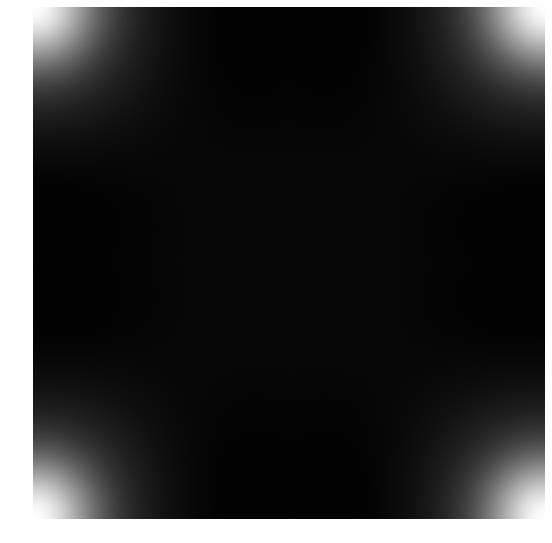

In [12]:
pamtf = aplt.arrayplot2d(amtf,2)